### SQL Server Ingestion SQLALCHEMY

In [128]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [100]:
#making connection to local MS SQL server with window authentication
server = "DESKTOP-9CI5KOH"
database = "AdventureWorksDW2019"
driver = "SQL Server Native Client 11.0"  #"ODBC Driver 17for SQL Server"
connection_database = f'mssql://@{server}/{database}?driver={driver}'

In [119]:
engine = create_engine(connection_database)
connection = engine.connect()

In [131]:
internet_sales_data = pd.read_sql("""SELECT fs.ProductKey,
p.EnglishProductName,
p.EnglishDescription,
sp.EnglishProductSubcategoryName,
cp.EnglishProductCategoryName,
fs.SalesOrderNumber,
fs.UnitPrice,
fs.ExtendedAmount, 
fs.OrderQuantity,
fs.ProductStandardCost,
fs.TotalProductCost,
fs.SalesAmount,
fs.TaxAmt,
fs.Freight,
fs.OrderDate,
fs.ShipDate,
fs.DueDate,
p.Color,
p.Size, 
p.SafetyStockLevel
FROM [dbo].[FactInternetSales] AS fs
INNER JOIN [dbo].[DimProduct] AS p
ON fs.ProductKey = p.ProductKey
INNER JOIN [dbo].[DimProductSubcategory] AS sp
ON p.ProductSubcategoryKey = sp.ProductSubcategoryKey
INNER JOIN [dbo].[DimProductCategory] AS cp
ON sp.ProductCategoryKey = cp.ProductCategoryKey;""", connection)

In [132]:
print(internet_sales_data.head(3))

   ProductKey       EnglishProductName  \
0         310         Road-150 Red, 62   
1         346  Mountain-100 Silver, 44   
2         346  Mountain-100 Silver, 44   

                                  EnglishDescription  \
0  This bike is ridden by race winners. Developed...   
1  Top-of-the-line competition mountain bike. Per...   
2  Top-of-the-line competition mountain bike. Per...   

  EnglishProductSubcategoryName EnglishProductCategoryName SalesOrderNumber  \
0                    Road Bikes                      Bikes          SO43697   
1                Mountain Bikes                      Bikes          SO43698   
2                Mountain Bikes                      Bikes          SO43699   

   UnitPrice  ExtendedAmount  OrderQuantity  ProductStandardCost  \
0    3578.27         3578.27              1            2171.2942   
1    3399.99         3399.99              1            1912.1544   
2    3399.99         3399.99              1            1912.1544   

   TotalProductC

In [133]:
internet_sales_data.shape

(60398, 20)

In [134]:
internet_sales_data.dtypes

ProductKey                                int64
EnglishProductName                       object
EnglishDescription                       object
EnglishProductSubcategoryName            object
EnglishProductCategoryName               object
SalesOrderNumber                         object
UnitPrice                               float64
ExtendedAmount                          float64
OrderQuantity                             int64
ProductStandardCost                     float64
TotalProductCost                        float64
SalesAmount                             float64
TaxAmt                                  float64
Freight                                 float64
OrderDate                        datetime64[ns]
ShipDate                         datetime64[ns]
DueDate                          datetime64[ns]
Color                                    object
Size                                     object
SafetyStockLevel                          int64
dtype: object

In [135]:
#product key from int type to string
internet_sales_data["ProductKey"] = internet_sales_data["ProductKey"].apply(str)
internet_sales_data.dtypes

ProductKey                               object
EnglishProductName                       object
EnglishDescription                       object
EnglishProductSubcategoryName            object
EnglishProductCategoryName               object
SalesOrderNumber                         object
UnitPrice                               float64
ExtendedAmount                          float64
OrderQuantity                             int64
ProductStandardCost                     float64
TotalProductCost                        float64
SalesAmount                             float64
TaxAmt                                  float64
Freight                                 float64
OrderDate                        datetime64[ns]
ShipDate                         datetime64[ns]
DueDate                          datetime64[ns]
Color                                    object
Size                                     object
SafetyStockLevel                          int64
dtype: object

In [136]:
internet_sales_data.describe()

,UnitPrice,ExtendedAmount,OrderQuantity,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,SafetyStockLevel
count,60398.000000,60398.000000,60398.0,60398.000000,60398.000000,60398.000000,60398.000000,60398.000000,60398.000000
mean,486.086911,486.086911,1.0,286.065657,286.065657,486.086911,38.886954,12.152217,144.296301
std,928.489892,928.489892,0.0,552.457641,552.457641,928.489892,74.279193,23.212248,200.592882
min,2.290000,2.290000,1.0,0.856500,0.856500,2.290000,0.183200,0.057300,4.000000
25%,7.950000,7.950000,1.0,2.973300,2.973300,7.950000,0.636000,0.198800,4.000000
50%,29.990000,29.990000,1.0,11.216300,11.216300,29.990000,2.399200,0.749800,4.000000
75%,539.990000,539.990000,1.0,294.579700,294.579700,539.990000,43.199200,13.499800,100.000000
max,3578.270000,3578.270000,1.0,2171.294200,2171.294200,3578.270000,286.261600,89.456800,500.000000


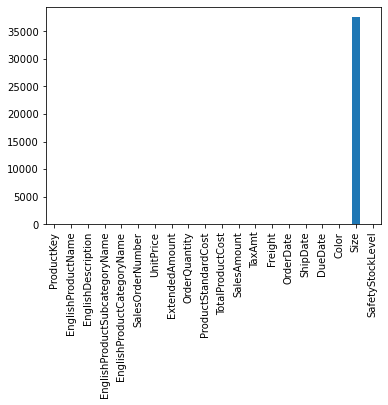

In [138]:
internet_sales_data.isna().sum().plot(kind="bar")
plt.show()

In [141]:
Gross_profit = internet_sales_data['SalesAmount'] - internet_sales_data["TotalProductCost"]
internet_sales_data["GrossProfit"] = Gross_profit
print(internet_sales_data.head(3))

  ProductKey       EnglishProductName  \
0        310         Road-150 Red, 62   
1        346  Mountain-100 Silver, 44   
2        346  Mountain-100 Silver, 44   

                                  EnglishDescription  \
0  This bike is ridden by race winners. Developed...   
1  Top-of-the-line competition mountain bike. Per...   
2  Top-of-the-line competition mountain bike. Per...   

  EnglishProductSubcategoryName EnglishProductCategoryName SalesOrderNumber  \
0                    Road Bikes                      Bikes          SO43697   
1                Mountain Bikes                      Bikes          SO43698   
2                Mountain Bikes                      Bikes          SO43699   

   UnitPrice  ExtendedAmount  OrderQuantity  ProductStandardCost  ...  \
0    3578.27         3578.27              1            2171.2942  ...   
1    3399.99         3399.99              1            1912.1544  ...   
2    3399.99         3399.99              1            1912.1544  ...   



In [148]:

Total_profit = (internet_sales_data["GrossProfit"] - (internet_sales_data["TaxAmt"] + internet_sales_data["Freight"]))
internet_sales_data["TotalProfit"] = Total_profit
print(internet_sales_data.head())

  ProductKey       EnglishProductName  \
0        310         Road-150 Red, 62   
1        346  Mountain-100 Silver, 44   
2        346  Mountain-100 Silver, 44   
3        336       Road-650 Black, 62   
4        346  Mountain-100 Silver, 44   

                                  EnglishDescription  \
0  This bike is ridden by race winners. Developed...   
1  Top-of-the-line competition mountain bike. Per...   
2  Top-of-the-line competition mountain bike. Per...   
3  Value-priced bike with many features of our to...   
4  Top-of-the-line competition mountain bike. Per...   

  EnglishProductSubcategoryName EnglishProductCategoryName SalesOrderNumber  \
0                    Road Bikes                      Bikes          SO43697   
1                Mountain Bikes                      Bikes          SO43698   
2                Mountain Bikes                      Bikes          SO43699   
3                    Road Bikes                      Bikes          SO43700   
4                Moun

In [147]:
##sum of sales and total profit after tax
round(internet_sales_data.groupby("EnglishProductCategoryName")["SalesAmount","TotalProfit"].sum(),2)

C:\Users\48502\AppData\Local\Temp/ipykernel_11016/2655018624.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  round(internet_sales_data.groupby("EnglishProductCategoryName")["SalesAmount","TotalProfit"].sum(),2)


,SalesAmount,TotalProfit
EnglishProductCategoryName,,
Accessories,700759.96,365093.22
Bikes,28318144.65,8532390.57
Clothing,339772.61,100736.03


In [149]:
internet_sales_data.to_csv("InternetSales.csv",index=False)

### Data Pivoting

                            GrossProfit  OrderQuantity  SalesAmount  \
EnglishProductCategoryName                                            
Accessories                   438674.57          36092    700759.96   
Bikes                       11505796.50          15205  28318144.65   
Clothing                      136412.58           9101    339772.61   

                                TaxAmt  TotalProductCost  TotalProfit  
EnglishProductCategoryName                                             
Accessories                   56060.80         262085.39    365093.22  
Bikes                       2265451.62       16812348.15   8532390.57  
Clothing                      27181.81         203360.03    100736.03  


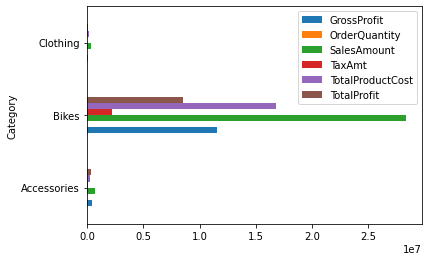

In [163]:
sales_by_category = round(internet_sales_data.pivot_table(index="EnglishProductCategoryName",
                                                      values=["SalesAmount","OrderQuantity","TotalProductCost","TaxAmt","GrossProfit","TotalProfit"],
                                                      aggfunc="sum"),2)
print(sales_by_category)
#sales_by_category.plot(kind="barh",xlabel="Category")
#plt.show()

In [179]:
sales_by_category_qty = round(internet_sales_data.pivot_table(index="EnglishProductCategoryName",
                                                      values=["SalesAmount","OrderQuantity"],
                                                      aggfunc="sum"),2)
print(sales_by_category)
#PRESENT IN sales_by_category IN A GRAPH USING PLT

                            GrossProfit  OrderQuantity  SalesAmount  \
EnglishProductCategoryName                                            
Accessories                   438674.57          36092    700759.96   
Bikes                       11505796.50          15205  28318144.65   
Clothing                      136412.58           9101    339772.61   

                                TaxAmt  TotalProductCost  TotalProfit  
EnglishProductCategoryName                                             
Accessories                   56060.80         262085.39    365093.22  
Bikes                       2265451.62       16812348.15   8532390.57  
Clothing                      27181.81         203360.03    100736.03  


In [156]:
sales_by_subcategory = round(internet_sales_data.pivot_table(index="EnglishProductSubcategoryName",
                                                      values=["SalesAmount","OrderQuantity","TotalProductCost","TaxAmt","GrossProfit","TotalProfit"],
                                                      aggfunc="sum"),2)
print(sales_by_subcategory)

                               GrossProfit  OrderQuantity  SalesAmount  \
EnglishProductSubcategoryName                                            
Bike Racks                        24639.36            328     39360.00   
Bike Stands                       24783.97            249     39591.00   
Bottles and Cages                 35555.35           7981     56798.19   
Caps                               4528.26           2190     19688.10   
Cleaners                           4518.84            908      7218.60   
Fenders                           29183.90           2121     46619.58   
Gloves                            21922.90           1430     35020.70   
Helmets                          141059.83           6440    225335.60   
Hydration Packs                   25232.57            733     40307.67   
Jerseys                           39778.66           3332    172950.68   
Mountain Bikes                  4513624.11           4970   9952759.56   
Road Bikes                      553729